In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [14]:
data = pd.read_csv('submariner_chrono.csv', index_col=0)
data

,Watch_Name,Price,Watch_Mark
0,Rolex Submariner Date,"8,900",16610 Green Sticker Top Conditions
1,Rolex Submariner Date,"18,366",Bluesy Two Tone Gold 126613LB 41mm Complete Se...
2,Rolex Submariner Date,"14,795",In Stock Submariner Date Kermit 126610LV Oyste...
3,Rolex Submariner Date,"15,850",41mm Green Starbucks 126610LV
4,Rolex Submariner Date,"10,899",1993 Rolex 16613 Submariner Blue Stainless Ste...
...,...,...,...
8667,Rolex Submariner Date,"8,186",126610lv
8668,Rolex Submariner Date,"19,289",126613LN
8669,Rolex Submariner Date,"21,830",Auth ROLEX Submariner Date 16610LV Z858213 Bla...
8670,Rolex Submariner (No Date),"47,572",Ref.5508 tropical dial 6ドット


In [ ]:
info = data.info()

# Descriptive statistics for numeric and object columns
descriptive_stats = data.describe(include='all')

data = data.drop_duplicates(subset=['Watch_Name', 'Watch_Mark'])


# Check for missing values
missing_values = data.isnull().sum()

# info, descriptive_stats, missing_values,

In [ ]:
# Convert the "Price" column to numeric, removing commas
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Fill missing values in "Watch_Mark" with a placeholder "Not Specified"
data['Watch_Mark'] = data['Watch_Mark'].fillna('Not Specified')

# Verify changes
data.info(), data.head(

In [15]:
def find_mm(text):
    # Search for patterns that resemble measurements in mm (e.g., "41mm", "40 mm")
    matches = re.findall(r'\d{2,3}\s?mm', text, re.IGNORECASE)
    if matches:
        # Return the first match found, ensuring uniformity in the format
        return matches[0].strip().lower()
    return None

# Adjust the function to handle non-string (e.g., NaN) values gracefully
def find_mm_safe(text):
    if pd.isnull(text):
        return None
    return find_mm(text)

df = data
# Apply the adjusted function to the 'Watch_Mark' column
df['Size_mm'] = df['Watch_Mark'].apply(find_mm_safe)

# Summarize the unique sizes found and their counts
size_counts = df['Size_mm'].value_counts().reset_index()
size_counts.columns = ['Size_mm', 'Count']


In [16]:
info_data = data.groupby('Watch_Name')['Price'].describe()
info_data

,count,unique,top,freq
Watch_Name,,,,
Rolex Submariner,118,114,"13,900",3
Rolex Submariner (No Date),1823,1305,"13,900",17
Rolex Submariner Date,6731,3553,"13,900",32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5291 entries, 0 to 8671
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Watch_Name  5291 non-null   object
 1   Price       5291 non-null   object
 2   Watch_Mark  5290 non-null   object
 3   Size_mm     1342 non-null   object
dtypes: object(4)
memory usage: 206.7+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5291 entries, 0 to 8671
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Watch_Name  5291 non-null   object 
 1   Price       5291 non-null   float64
 2   Watch_Mark  5291 non-null   object 
 3   Size_mm     1342 non-null   object 
dtypes: float64(1), object(3)
memory usage: 206.7+ KB


(None,
               Watch_Name    Price  \
 0  Rolex Submariner Date   8900.0   
 1  Rolex Submariner Date  18366.0   
 2  Rolex Submariner Date  14795.0   
 3  Rolex Submariner Date  15850.0   
 4  Rolex Submariner Date  10899.0   
 
                                           Watch_Mark Size_mm  
 0                 16610 Green Sticker Top Conditions    None  
 1  Bluesy Two Tone Gold 126613LB 41mm Complete Se...    41mm  
 2  In Stock Submariner Date Kermit 126610LV Oyste...    None  
 3                      41mm Green Starbucks 126610LV    41mm  
 4  1993 Rolex 16613 Submariner Blue Stainless Ste...    None  )

In [20]:
price_describe = data['Price'].describe()
price_median = data['Price'].median()
price_describe, price_median

(count      5291.000000
 mean      20016.185787
 std       22931.353508
 min          65.000000
 25%       10985.000000
 50%       14995.000000
 75%       20978.500000
 max      740000.000000
 Name: Price, dtype: float64,
 14995.0)

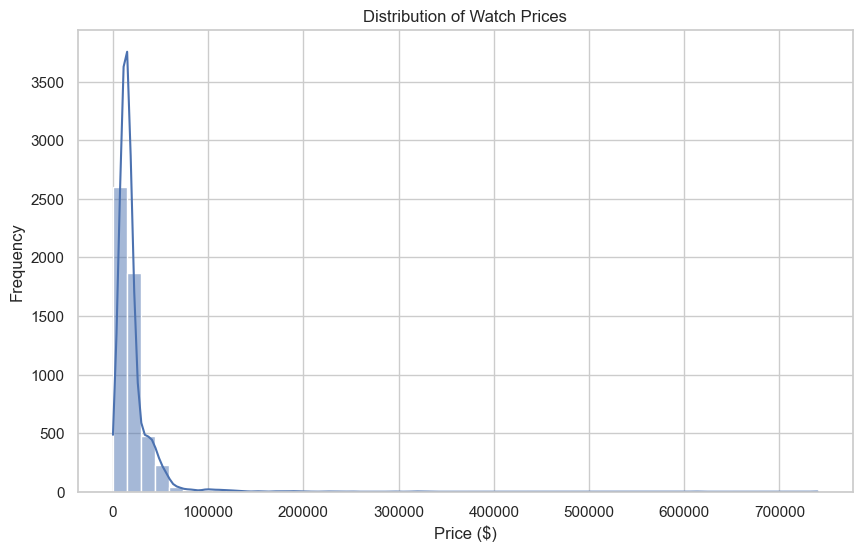

In [21]:
sns.set(style="whitegrid")

# Plot the distribution of watch prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Watch Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [22]:
average_prices_by_model = data.groupby('Watch_Name')['Price'].mean().reset_index()

# Sort by average price for better visualization
average_prices_by_model_sorted = average_prices_by_model.sort_values('Price', ascending=False)

average_prices_by_model_sorted

,Watch_Name,Price
0,Rolex Submariner,25196.964602
2,Rolex Submariner Date,20268.877258
1,Rolex Submariner (No Date),18603.209323


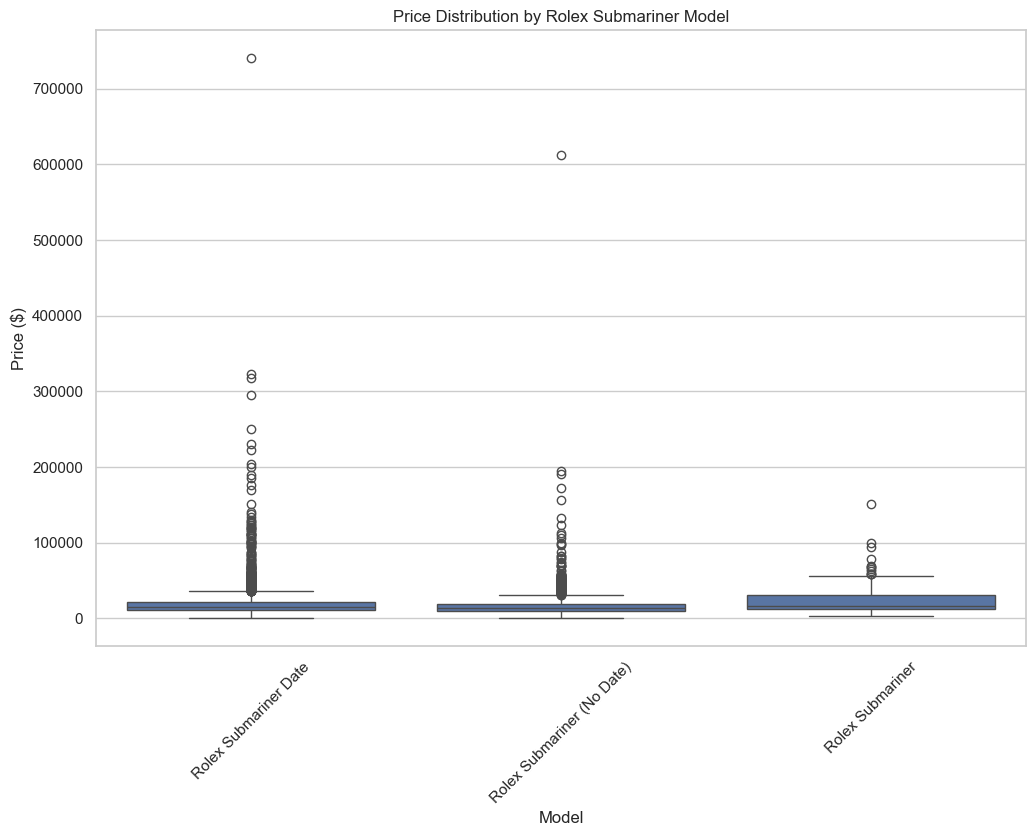

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Watch_Name', y='Price', data=data)
plt.title('Price Distribution by Rolex Submariner Model')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


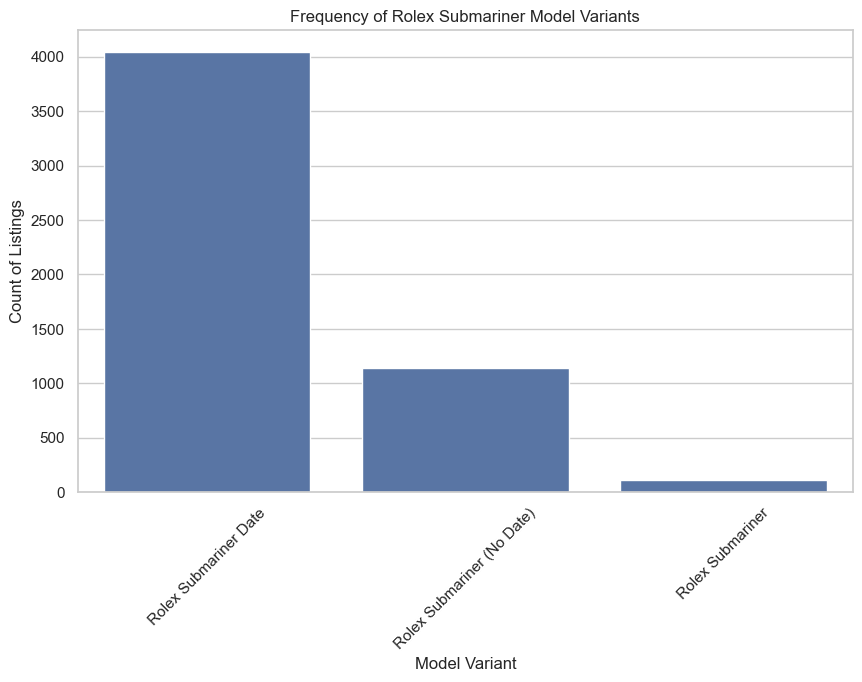

In [24]:
# Count of listings for each Rolex Submariner model
model_counts = data['Watch_Name'].value_counts().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Watch_Name', data=model_counts)
plt.title('Frequency of Rolex Submariner Model Variants')
plt.xlabel('Model Variant')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.show()

In [25]:
keywords = {
    'colors': ["black", "white", "red", "blue", "green", "yellow", "orange", "purple","gold", "silver", 
                "gray", "brown", "pink", "lime", "teal", "olive",
               "mint", "indigo", "violet", "tan", "cream", "sapphire", "bluesy", "chocolate", "grey", "lime"],
    'materials': ['oystersteel', 'yellow gold', 'white gold', 'everose gold','steel', 'stainless', 'gold', 'ceramic', 
                  'tropical dial', 'sapphire', 'luminous','diamonds', 'leather', 'rubber'],
    'editions': ['kermit', 'hulk', 'cermit', 'serti', 'smurf', 'starbucks',
                 'black', 'two-tone', '50th anniversary submariner',
                 'oyster perpetual', 'ghost bezel',
                'maxi dial','transitional', 'military', 'comex', 'red', 'blue'],
    'bezels': ['aluminum bezel', 'cerachrom bezel', 'ceramic bezel', 'blue ceramic bezel', 'black ceramic bezel',
               'diamond bezel', 'green bezel', 'cerachrom bezel', 'mkii bezel', 'mk1 bezel'],
    'sizes': ['40mm', '41mm', '37mm', '36mm', '39 mm']
}


# Function to count the occurrences of each keyword
def count_keywords(df, column, keywords):
    keyword_counts = {key: {k: 0 for k in keywords[key]} for key in keywords}
    for key, words in keywords.items():
        for word in words:
            keyword_counts[key][word] = df[column].str.contains(word, case=False, regex=False).sum()
    return keyword_counts

# Count the occurrences of colors, materials, and special editions in "Watch_Mark"
keyword_counts = count_keywords(data, 'Watch_Mark', keywords)

keyword_counts

{'colors': {'black': 849,
  'white': 94,
  'red': 129,
  'blue': 600,
  'green': 250,
  'yellow': 438,
  'orange': 1,
  'purple': 23,
  'gold': 802,
  'silver': 7,
  'gray': 2,
  'brown': 12,
  'pink': 1,
  'lime': 4,
  'teal': 1,
  'olive': 1,
  'mint': 110,
  'indigo': 3,
  'violet': 3,
  'tan': 53,
  'cream': 11,
  'sapphire': 11,
  'bluesy': 102,
  'chocolate': 1,
  'grey': 2},
 'materials': {'oystersteel': 26,
  'yellow gold': 432,
  'white gold': 87,
  'everose gold': 0,
  'steel': 1064,
  'stainless': 481,
  'gold': 802,
  'ceramic': 390,
  'tropical dial': 20,
  'sapphire': 11,
  'luminous': 3,
  'diamonds': 9,
  'leather': 1,
  'rubber': 18},
 'editions': {'kermit': 303,
  'hulk': 242,
  'cermit': 5,
  'serti': 69,
  'smurf': 44,
  'starbucks': 196,
  'black': 849,
  'two-tone': 53,
  '50th anniversary submariner': 1,
  'oyster perpetual': 59,
  'ghost bezel': 7,
  'maxi dial': 30,
  'transitional': 17,
  'military': 2,
  'comex': 21,
  'red': 129,
  'blue': 600},
 'bezels': {

In [26]:
# Function to calculate average price for watches mentioning each keyword
def average_price_for_keywords(df, column, keywords):
    average_prices = {key: {} for key in keywords}
    for key, words in keywords.items():
        for word in words:
            filtered_df = df[df[column].str.contains(word, case=False, regex=False)]
            average_prices[key][word] = filtered_df['Price'].mean()
    return average_prices


# Calculate average prices for colors, materials, and editions
average_prices_keywords = average_price_for_keywords(data, 'Watch_Mark', keywords)

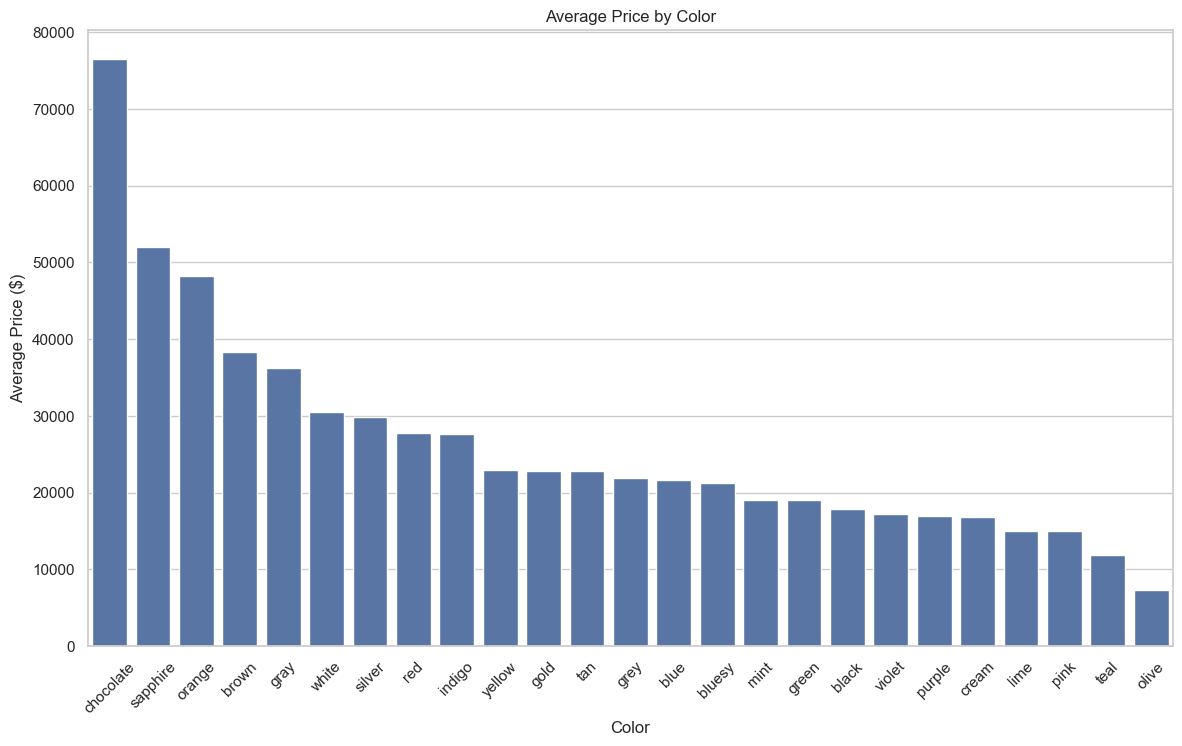

In [27]:
colors_data = pd.DataFrame(average_prices_keywords['colors'].items(), columns=['Color', 'Average Price']).dropna()

# Create the bar plot for colors
plt.figure(figsize=(14, 8))
sns.barplot(x='Color', y='Average Price', data=colors_data.sort_values('Average Price', ascending=False))
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

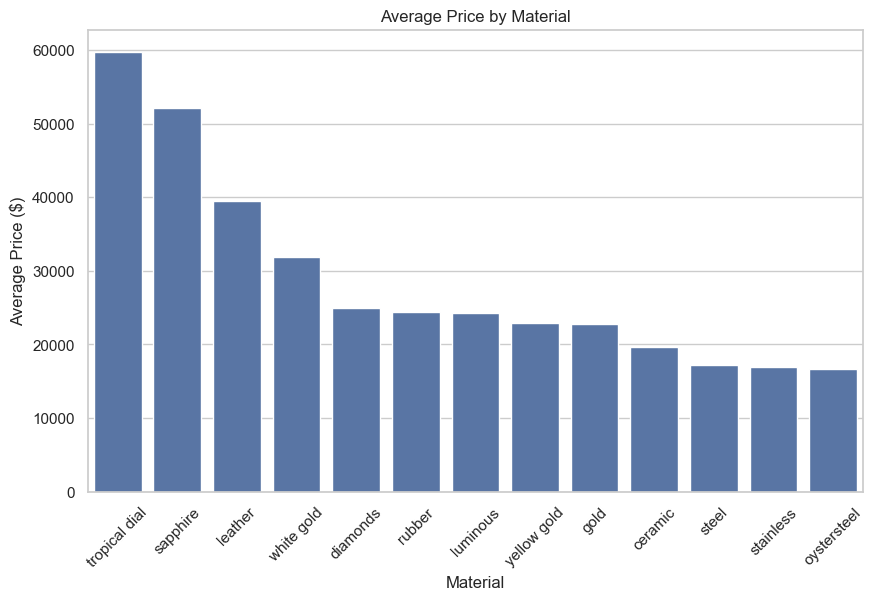

In [28]:
materials_data = pd.DataFrame(average_prices_keywords['materials'].items(), columns=['Material', 'Average Price']).dropna()

# Create the bar plot for materials
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Average Price', data=materials_data.sort_values('Average Price', ascending=False))
plt.title('Average Price by Material')
plt.xlabel('Material')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

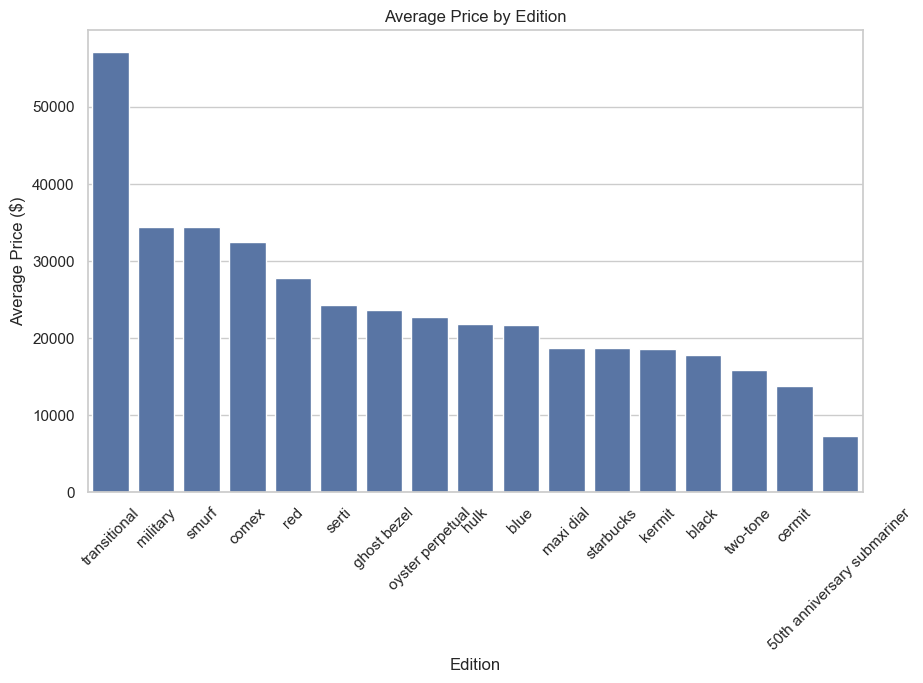

In [29]:
editions_data = pd.DataFrame(average_prices_keywords['editions'].items(), columns=['Edition', 'Average Price']).dropna()

# Create the bar plot for materials
plt.figure(figsize=(10, 6))
sns.barplot(x='Edition', y='Average Price', data=editions_data.sort_values('Average Price', ascending=False))
plt.title('Average Price by Edition')
plt.xlabel('Edition')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

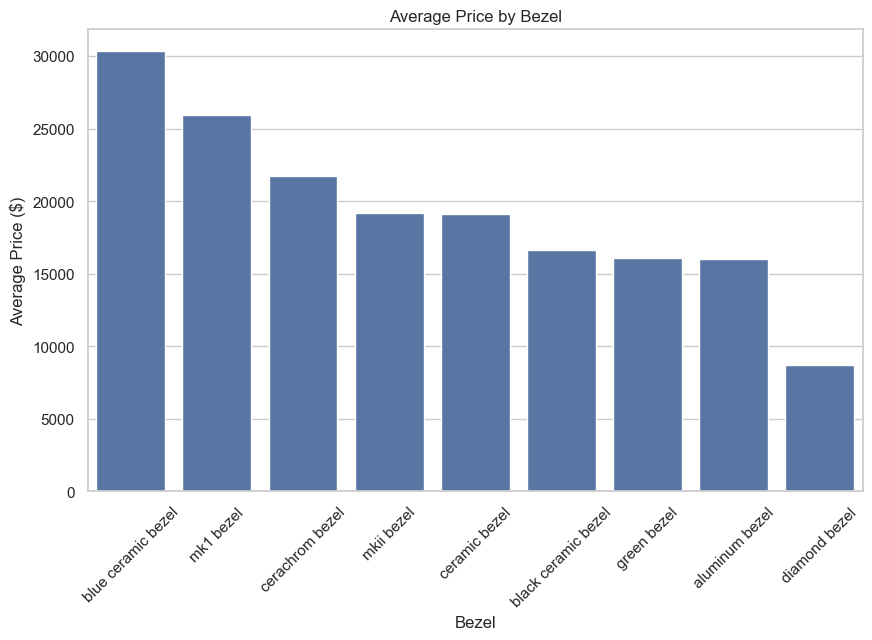

In [30]:
bezels_data = pd.DataFrame(average_prices_keywords['bezels'].items(), columns=['Bezel', 'Average Price']).dropna()

# Create the bar plot for bezels
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezel', y='Average Price', data=bezels_data.sort_values('Average Price', ascending=False))
plt.title('Average Price by Bezel')
plt.xlabel('Bezel')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

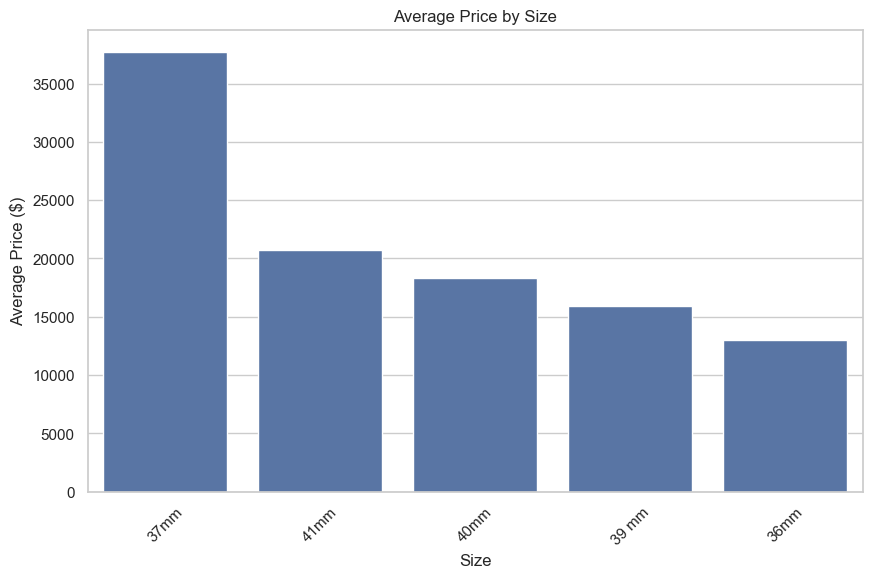

In [31]:
sizes_data = pd.DataFrame(average_prices_keywords['sizes'].items(), columns=['Size', 'Average Price']).dropna()

# Create the bar plot for bezels
plt.figure(figsize=(10, 6))
sns.barplot(x='Size', y='Average Price', data=sizes_data.sort_values('Average Price', ascending=False))
plt.title('Average Price by Size')
plt.xlabel('Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

/var/folders/qr/nfz_vhys73j2l0csz_8956140000gn/T/ipykernel_29209/4131384823.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Color', y='Frequency', data=colors_df.sort_values('Frequency', ascending=False), ax=axs[0], palette='viridis')
/var/folders/qr/nfz_vhys73j2l0csz_8956140000gn/T/ipykernel_29209/4131384823.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Material', y='Frequency', data=materials_df.sort_values('Frequency', ascending=False), ax=axs[1], palette='viridis')
/var/folders/qr/nfz_vhys73j2l0csz_8956140000gn/T/ipykernel_29209/4131384823.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

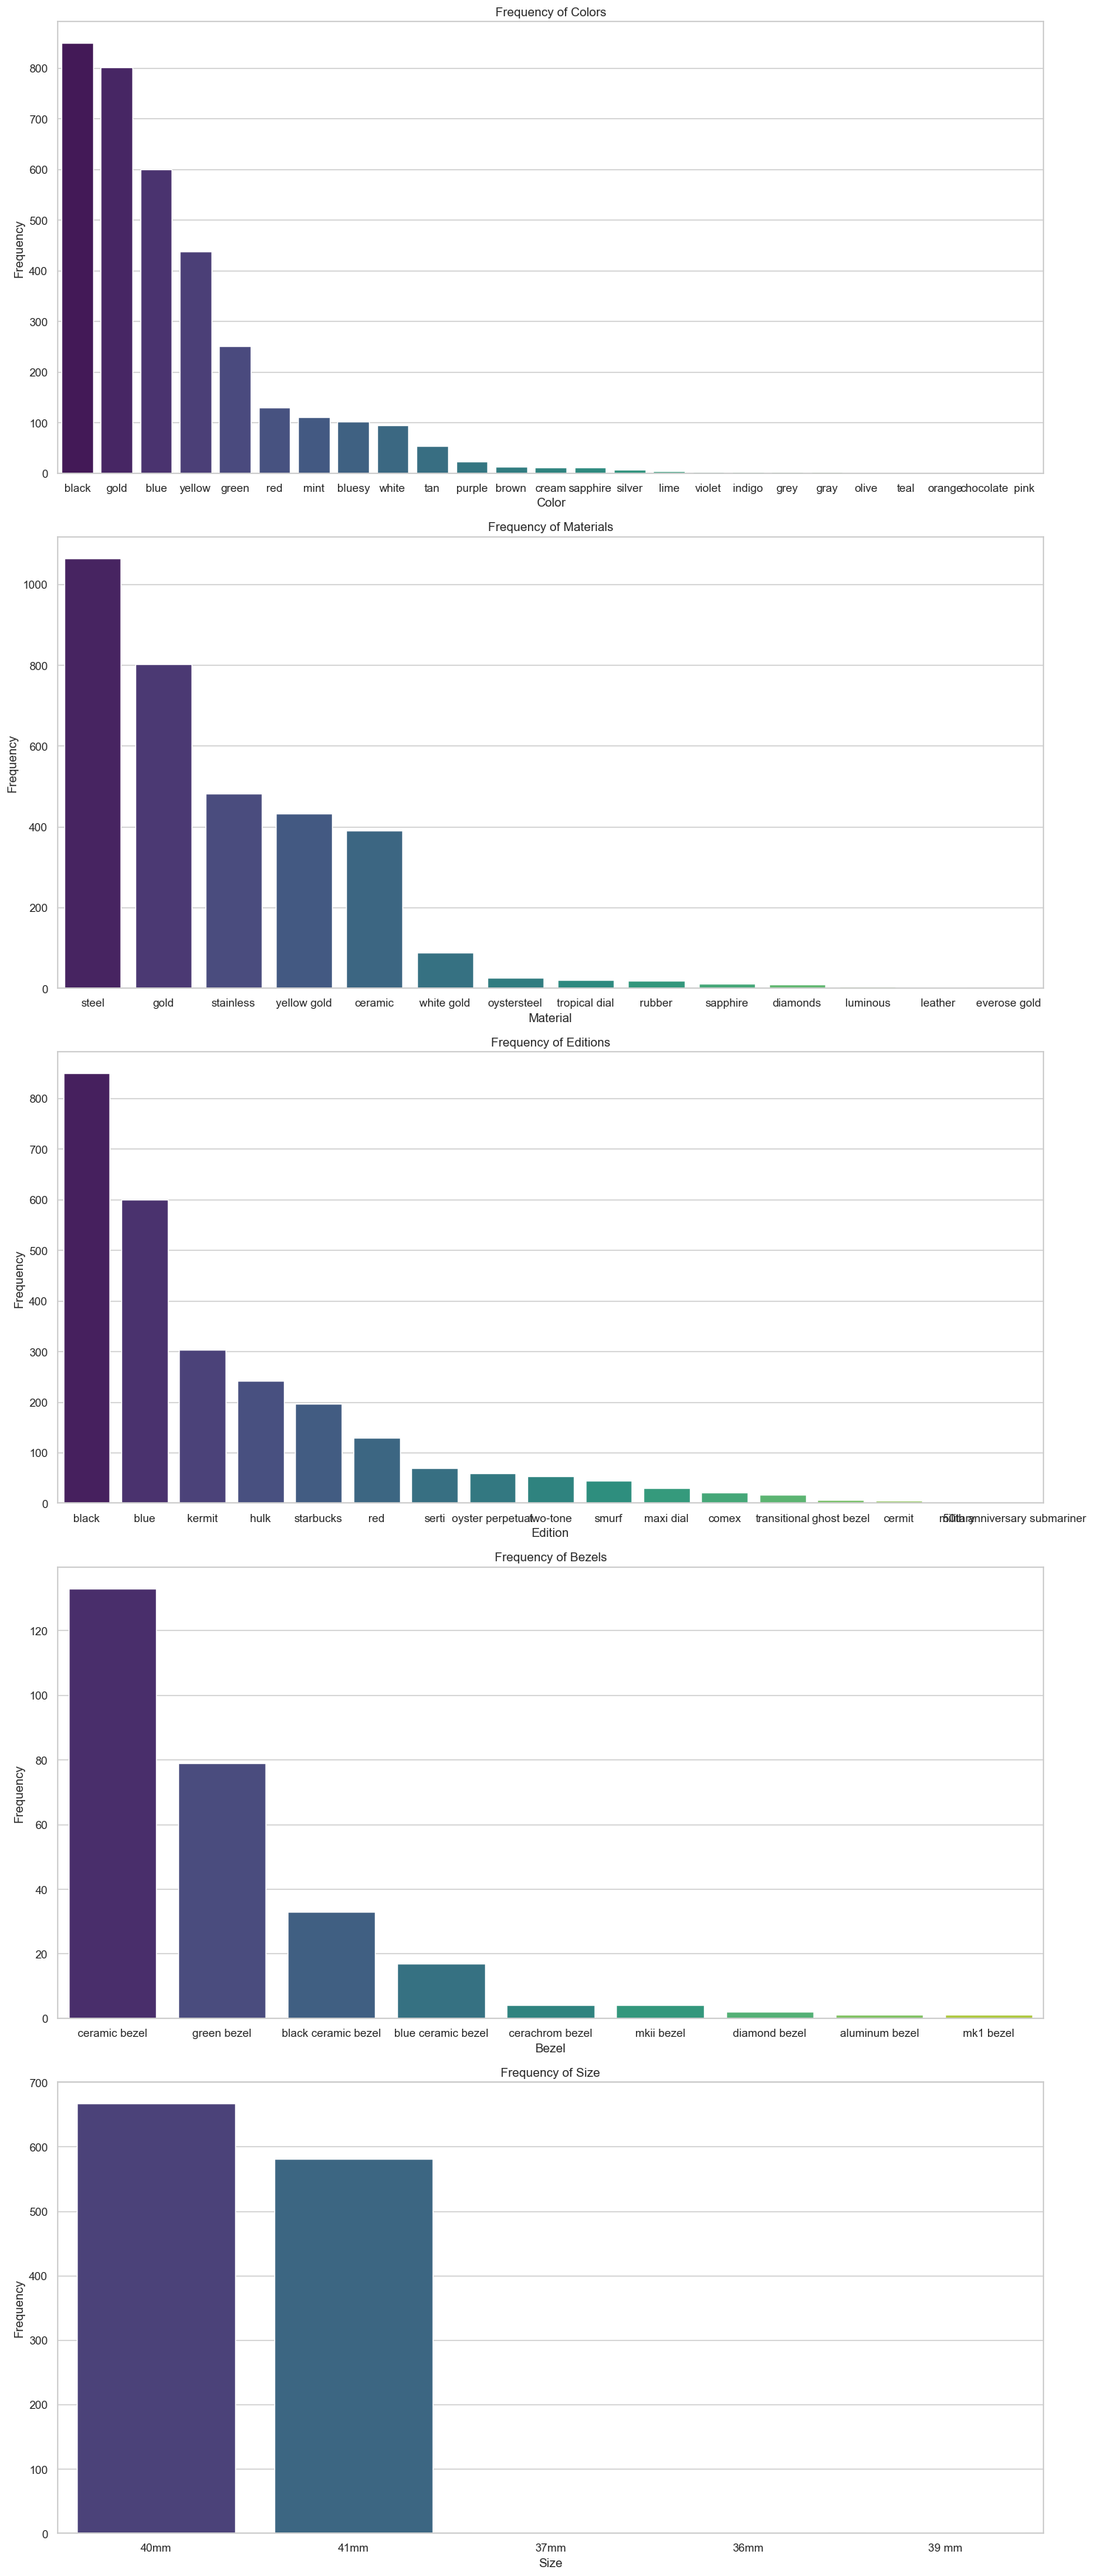

In [32]:
# Converting these dictionaries into pandas DataFrames for plotting
colors_df = pd.DataFrame(list(keyword_counts['colors'].items()), columns=['Color', 'Frequency'])
materials_df = pd.DataFrame(list(keyword_counts['materials'].items()), columns=['Material', 'Frequency'])
editions_df = pd.DataFrame(list(keyword_counts['editions'].items()), columns=['Edition', 'Frequency'])
bezels_df = pd.DataFrame(list(keyword_counts['bezels'].items()), columns=['Bezel', 'Frequency'])
sizes_df = pd.DataFrame(list(keyword_counts['sizes'].items()), columns=['Size', 'Frequency'])

# Setting up the plotting environment
sns.set(style="whitegrid")

# Creating frequency plots for each category based on the provided data
fig, axs = plt.subplots(5, 1, figsize=(15, 35))

# Colors
sns.barplot(x='Color', y='Frequency', data=colors_df.sort_values('Frequency', ascending=False), ax=axs[0], palette='viridis')
axs[0].set_title('Frequency of Colors')

# Materials
sns.barplot(x='Material', y='Frequency', data=materials_df.sort_values('Frequency', ascending=False), ax=axs[1], palette='viridis')
axs[1].set_title('Frequency of Materials')

# Editions
sns.barplot(x='Edition', y='Frequency', data=editions_df.sort_values('Frequency', ascending=False), ax=axs[2], palette='viridis')
axs[2].set_title('Frequency of Editions')

# Bezels
sns.barplot(x='Bezel', y='Frequency', data=bezels_df.sort_values('Frequency', ascending=False), ax=axs[3], palette='viridis')
axs[3].set_title('Frequency of Bezels')

# Size
sns.barplot(x='Size', y='Frequency', data=sizes_df.sort_values('Frequency', ascending=False), ax=axs[4], palette='viridis')
axs[4].set_title('Frequency of Size')

# Adjusting layout for better visibility
plt.tight_layout()
# Displaying the plots
plt.show()

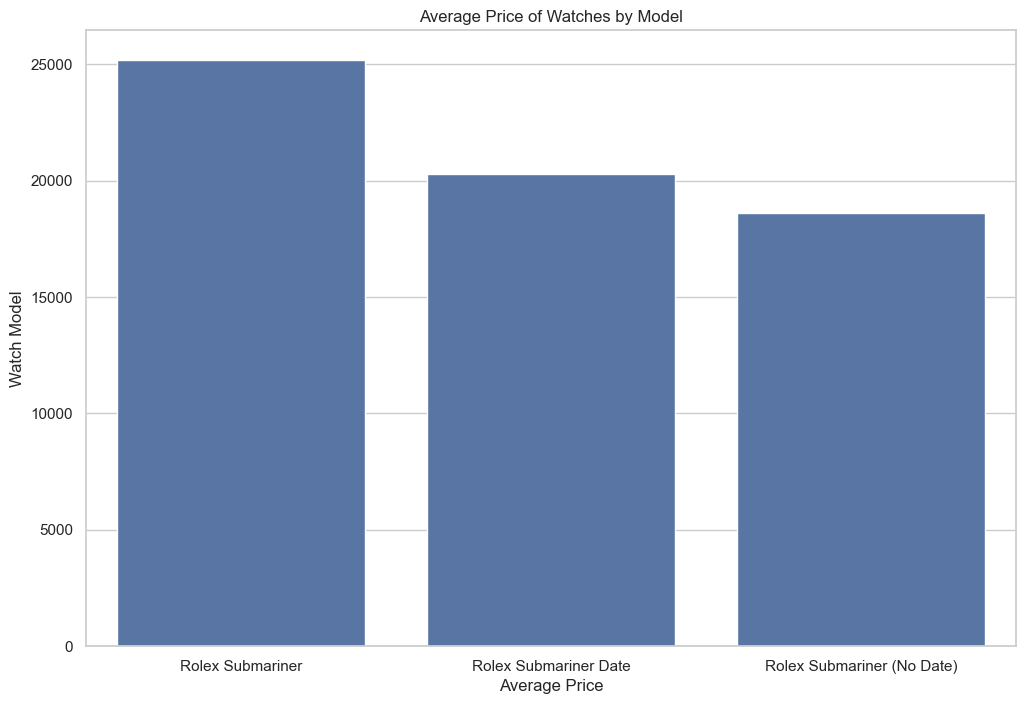

In [33]:
average_price_by_model = data.groupby('Watch_Name')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Watch_Name', y='Price', data=average_price_by_model)
plt.title('Average Price of Watches by Model')
plt.xlabel('Average Price')
plt.ylabel('Watch Model')
plt.show()

In [34]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, np.max(data['Price'])]
labels = ['Under $5k', '$5k-$10k', '$10k-$15k', '$15k-$20k', '$20k-$25k', '$25k-$30k', 'Above $30k']
data['Price_Range'] = pd.cut(data['Price'], bins=bins, labels=labels, include_lowest=True)
price_range_distribution = data['Price_Range'].value_counts().sort_index()

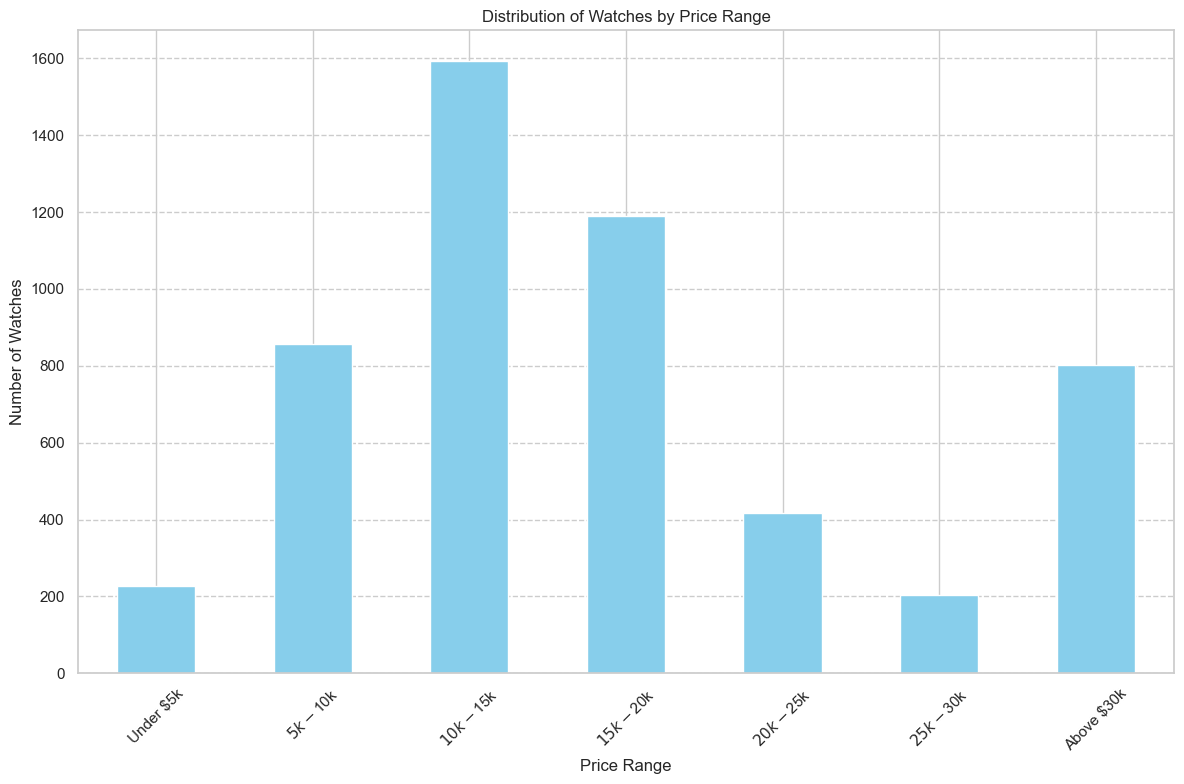

In [35]:
plt.figure(figsize=(12, 8))
price_range_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Watches by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Watches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()